In [1]:
import pandas as pd
import numpy as np
import threading
import time
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt


In [3]:
data_file = 'SPY.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(data_file, index_col='Date', parse_dates=True)
df['1d-pct-change'] = df['Adj Close'].pct_change(periods=1)

df.head(10)


,Open,High,Low,Close,Adj Close,Volume,1d-pct-change
Date,,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083679,72668200,NaN
2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926208,71178700,-0.000335
2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902649,104538900,-0.019202
2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469635,86858900,-0.000939
2022-01-07,467.950012,469.200012,464.649994,466.089996,458.649200,85111600,-0.003953
2022-01-10,462.700012,465.739990,456.600006,465.510010,458.078430,119362000,-0.001244
2022-01-11,465.230011,469.850006,462.049988,469.750000,462.250763,74303100,0.009108
2022-01-12,471.589996,473.200012,468.940002,471.019989,463.500458,67605400,0.002704
2022-01-13,472.190002,472.880005,463.440002,464.529999,457.114105,91173100,-0.013779


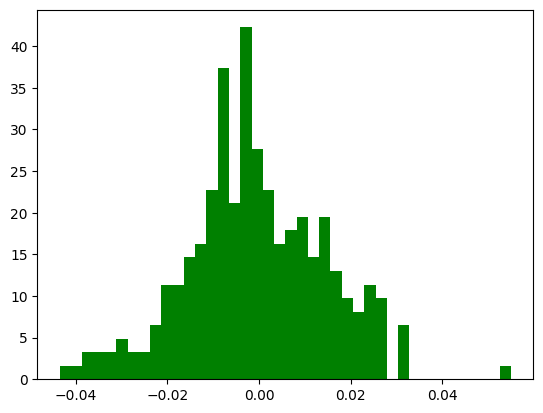

In [5]:
plt.hist(df['1d-pct-change'], bins=40, color='green', density=True)
plt.show()

In [8]:
daily_vol = df['1d-pct-change'].std() 
annual_vol = daily_vol * np.sqrt(252)
print(f'daily volatility: {daily_vol}, annulized volatility: {annual_vol}')